In [135]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeClassifier

# to handle data in form of rows and columns 
import pandas as pd    


# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


# 1. Load the dataset

In [144]:
parkdata=pd.read_csv('parkinsons.data')

In [145]:
parkdata.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [146]:
parkdata.shape

(195, 24)

In [148]:
parkdata.isnull().values.any() # Checking for Null values

False

In [180]:
parkdata['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [149]:
parkdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# 3. Using univariate and bivariate analysis to check the individual attributes for their basic statistic such as central          values, spread, tails etc. What are your observations? (15 points)

In [150]:
#Univariate analysis

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

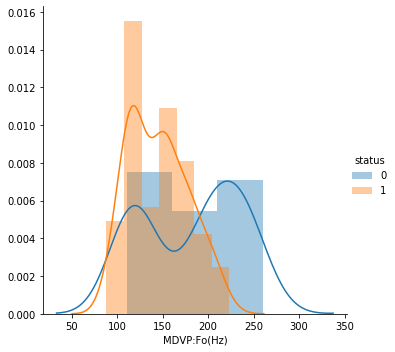

In [152]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:Fo(Hz)").add_legend()

### The Average vocal fundamental frequency (MDVP:Fo(Hz)) for most instances lies in the range of 100 to 270 hz. Status overlaps between the whole distribution, Healthy patients seem to be between 40 to 340 and patients with Parkinson are in between 50 to 270

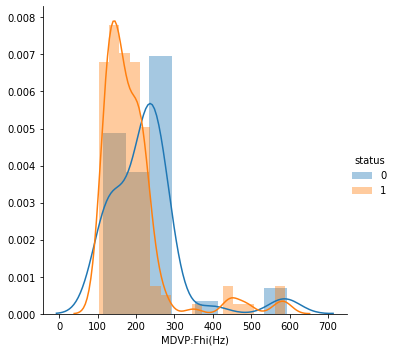

In [162]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:Fhi(Hz)").add_legend()

### The Maximum vocal fundamental frequency (MDVP:Fhi(Hz)) of most instances lies in the range 130 to 250 with quite some outliers having over 400 hz upto 650 hz of Maximum vocal fundamental frequency. Above feature does not provide a clear distinction between healthy and patients having parkinsons.

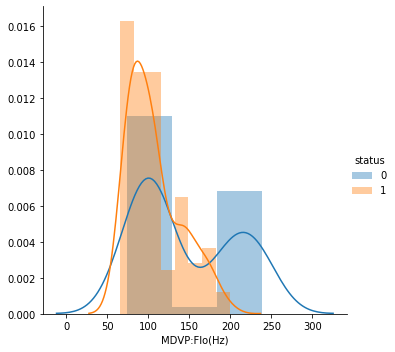

In [155]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:Flo(Hz)").add_legend()

### The Minimum vocal fundamental frequency (MDVP:Flo(Hz)) of most instances lies in the range 60 to 180 with quite some outliers having over 225 hz of Minimum vocal fundamental frequency. Healthy patients are spread over the whole distribution but patients with Parkinsons are between 45 to 240.

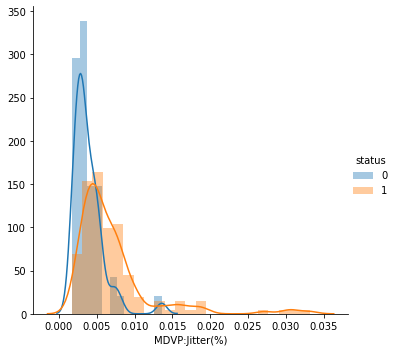

In [163]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:Jitter(%)").add_legend()

### The MDVP:Jitter(%)values for most of the instances lies in the range 0.002 to 0.008 with some outliers from 0.013 upto 0.037 (%). Healthy patients seem to be restricted between 0 to 0.016. Patients with Parkinsons extend over to 0.036.

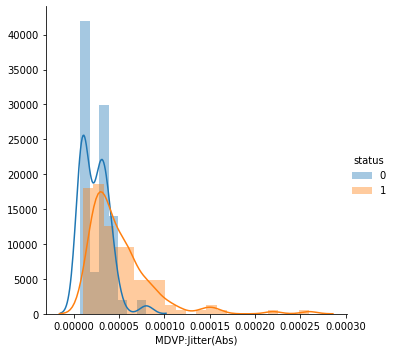

In [164]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:Jitter(Abs)").add_legend()

### The MDVP:Jitter(Abs) values for most of the instances lies in the range 0.00003 to 0.00007 with some outliers upto 0.00028. Patients with Parkinsons are spread till 0.00028 whereas healthy patients are limited to 0.00010

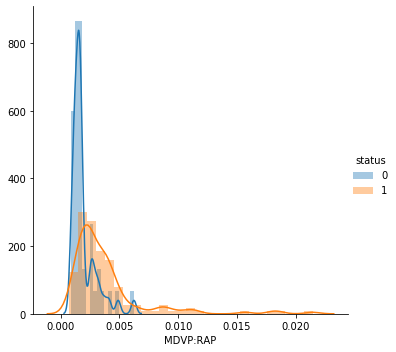

In [165]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:RAP").add_legend()

### The MDVP:RAP values values for most of the instances lies in the range 0.001  to 0.005 with some outliers from, 0.008 upto 0.025. Healthy patients are again limted till 0.007 whereas patients with parkinsons are stretching till 0.023

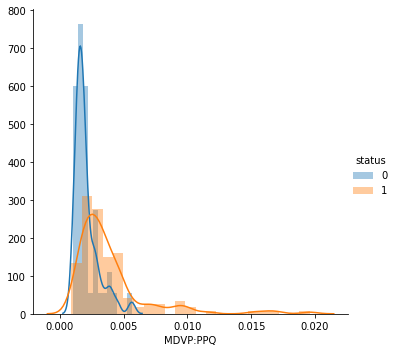

In [166]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:PPQ").add_legend()

# The MDVP:PPQ values for most instances lies in the range  0.0020 to 0.0040 with some outliers upto 0.020. Healthy patients again have values restricted to 0.007 whereas patients with parkinsons have values spread to 0.020

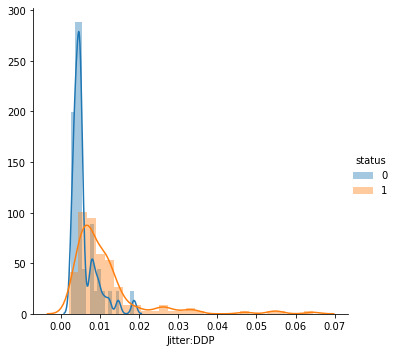

In [168]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "Jitter:DDP").add_legend()

### The Jitter:DDP values for most instances lies in the range 0.005 to 0.015 with high amount of outliers from 0.02 upto 0.07. Healthy patients are again restrcted to 0.02 whereas patients with parkinsons have values spread till 0.07

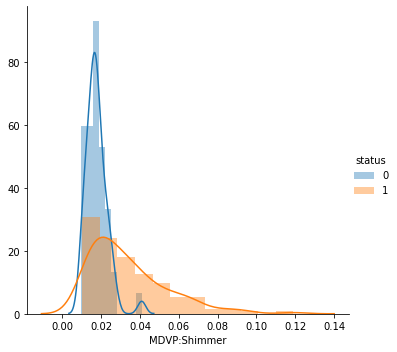

In [170]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:Shimmer").add_legend()

### The MDVP:Shimmer values for most instances lies in the range 0.005 to 0.05 with ouliers having values above 0.07 upto 0.13. Healthy patients have values restricted to 0.05 whereas patients with parkinsons have values spread till 0.14

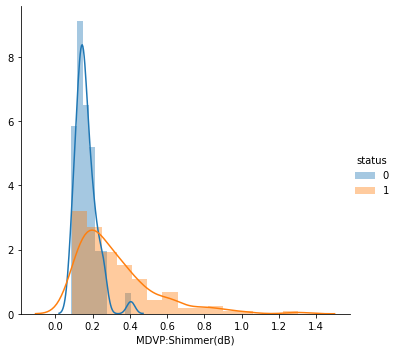

In [171]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:Shimmer(dB)").add_legend()

### The MDVP:Shimmer(dB) values for most instances lies in the range 0.05 to 0.5 with ouliers having values above 0.7 upto 1.4. Healthy patients have values restricted to 0.5 whereas patients with parkinsons have values extensing upto 1.5

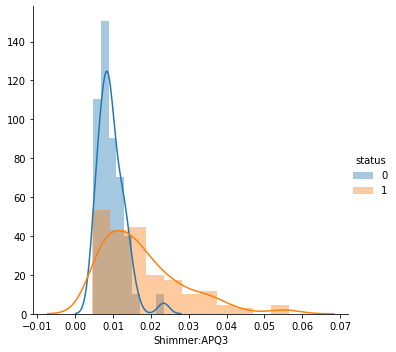

In [172]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "Shimmer:APQ3").add_legend()

### The Shimmer:APQ3 values for most instances lies in the range 0.005 to 0.025 with ouliers having values above 0.04 upto 0.07. Healthy patients tend to be restricted to 0.028 and the patients with parkinson have values up to 0.067

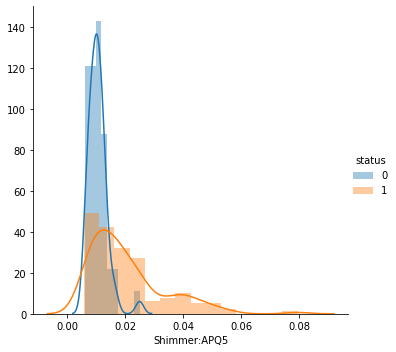

In [173]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "Shimmer:APQ5").add_legend()

### The Shimmer:APQ5 values for most instances lies in the range 0.005 to 0.025 with ouliers having values above 0.04 upto 0.09. Patients who are healthy tend to be restricted 0.025 whereas patients with parkinsons are extending upto 0.09

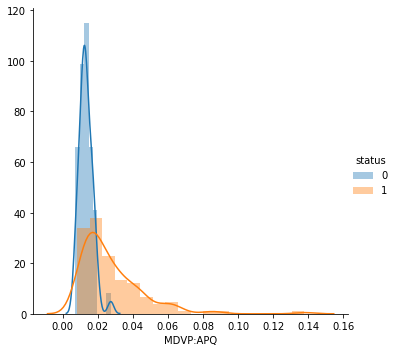

In [174]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "MDVP:APQ").add_legend()

### The MDVP:APQ values for most instances lies in the range 0.005 to 0.03 with ouliers having values above 0.05 upto 0.14. Healthy patients tend to be between 0 to 0.038 and patients with parkinsons tend to extend to 0.158

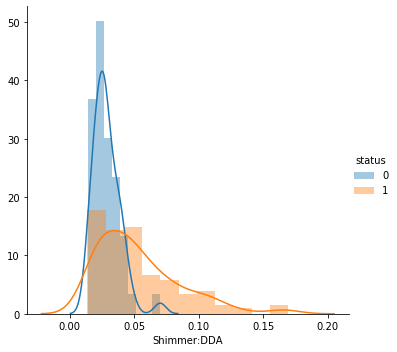

In [181]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "Shimmer:DDA").add_legend()

### The Shimmer:DDA values for most instances lies in the range 0.025 to 0.06 with ouliers having values above 0.12 upto 0.20. Healthy patients are restricted till 0.09 whereas patients with parkinsons extend upto 0.21

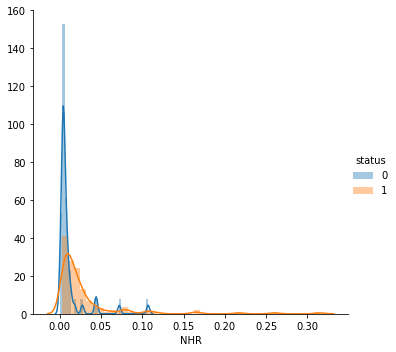

In [182]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "NHR").add_legend()

### The NHR values for most instances lies in the range 0.01 to 0.03 with ouliers having values above 0.06 upto 0.30. Healthy patients tend to be restricted and not greater than 0.15 whereas patients with Parkinsons tend to extend to 0.33

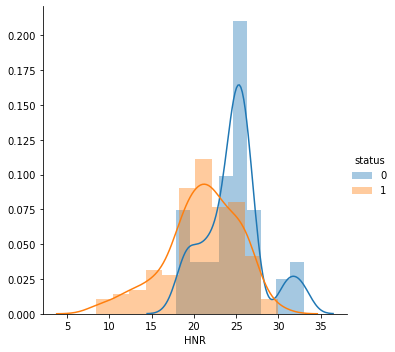

In [183]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "HNR").add_legend()

### The HNR values for most instances lies in the range 18 to 26 with  a few  ouliers having values below 10. The data is overlapping but patients with parkinsons tend to be more left aligned as compared to healthy patients. The patients with parkinsons tend to have low values and go upto 34 whereas healthy patients have comparatively higher HNR, starts from 15 and go upto 37

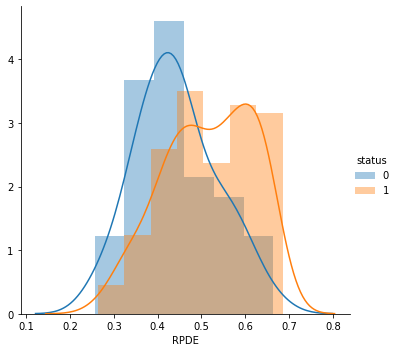

In [184]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "RPDE").add_legend()

### The RPDE values for most instances lies in the range 0.35 to 0.6 with no outliers. Healthy patients tend to exhibit a bell curve whereas patients with parkinsons tend to have multiple peaks but start and end in the same spread as healthy patients

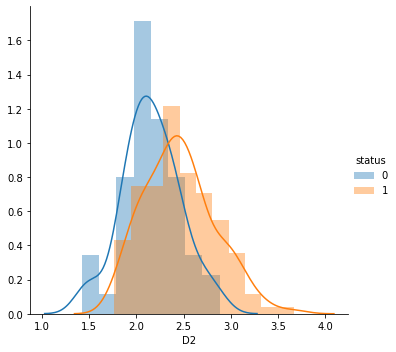

In [185]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "D2").add_legend()

### The D2 values for most instances lies in the range 2 to 3 with  outliers over 3.5. Healthy patients tend to start with a lower value and end at a 3.3 whereas patients with Parkinsons start at 1.3 and go upto 4.2. Both the distributions tend to show a bell curve

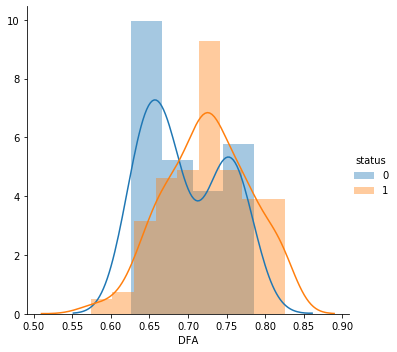

In [187]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "DFA").add_legend()

### The DFA values for most instances lies in the range 0.625 to 0.775 with no outliers. Patients with Parkinsons tend to show a bell curve whereas healthy patients start at a higher value (0.55) as compared to patients with parkinsons and also end at a lower value (0.86). Patients with parkinsons start at 0.51 and go upto 0.88

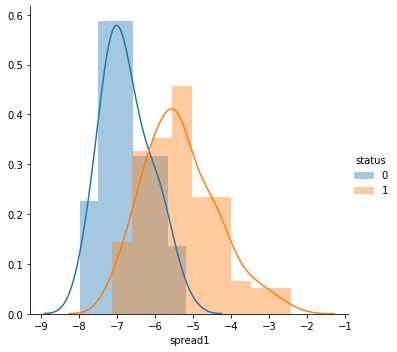

In [188]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "spread1").add_legend()

### The spread1 values for most instances lies in the range -6.5 to -4.5 with  outliers over -3 upto -1. The distribution for healthy and parkinson patients follow a bell curve which is peaked. Healthy patients start at -9 and go upto -.38 whereas patients with parkinsons go upto -.82 till -1.2

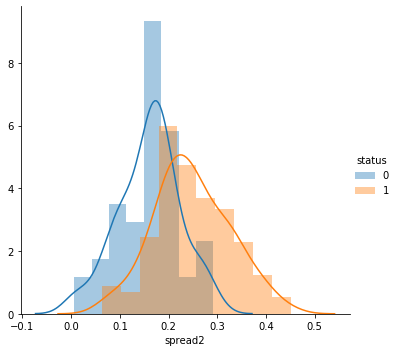

In [189]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "spread2").add_legend()

### The spread 2 values for most instances lies in the range 0.17 to 0.27 with outliers over 0.4 and below 0.0. Healthy patients tend to be between -0.08 to 0.38 and patients with parkinsons tend to be between -0.2 to 0.57

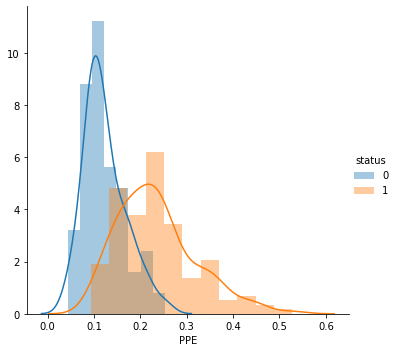

In [190]:
sns.FacetGrid(parkdata,hue='status', size=5).map(sns.distplot, "PPE").add_legend()

### The PPE values for most instances lies in the range 0.15 to 0.27 with outliers over 0.4 upto 0.6. Healhty patients tend to be -0.1 to 0.32 whereas patients with parkinsons have values extending from 0 to 0.62

## 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [191]:
X=parkdata.drop('status', axis=1)
y=parkdata['status']

In [192]:
X=X.drop('name',axis=1)

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [195]:
from sklearn.tree import DecisionTreeClassifier
dm=DecisionTreeClassifier(criterion = 'entropy')

In [196]:
dm.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [200]:
y_predict = dm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6440677966101694


In [201]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[11  6]
 [ 0 42]]


In [202]:
print(pd.crosstab(y_test, y_predict))


col_0    0   1
status        
0       11   6
1        0  42


## 7.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [203]:
val=np.arange(1,10)
modelscore=[]
for k in val:
    regmodel=DecisionTreeClassifier(criterion = 'entropy', max_depth = k,min_samples_leaf=k)
    regmodel.fit(X_train, y_train)
    regpredict = regmodel.predict(X_test)
    accuracy=metrics.accuracy_score(y_test, regpredict)
    modelscore.append(accuracy)

Text(0, 0.5, 'Accuracy')

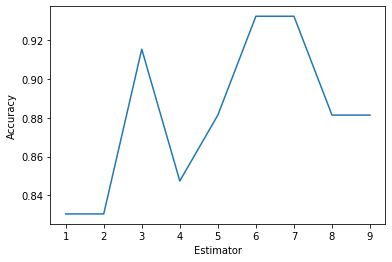

In [204]:
estimator = np.arange(1,400)
plt.plot(val, modelscore)
plt.xlabel('Estimator')
plt.ylabel('Accuracy')

### As per the graph above, the optimal value of mex depth and min_samples_leaf come to 6 so we train the model with those hyperparameters

In [205]:
    regmodel=DecisionTreeClassifier(criterion = 'entropy', max_depth = 6,min_samples_leaf=6)
    regmodel.fit(X_train, y_train)
    regpredict = regmodel.predict(X_test)
    accuracy=metrics.accuracy_score(y_test, regpredict)
    print(accuracy)

0.9322033898305084


In [207]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, regpredict))

[[15  2]
 [ 2 40]]


## 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [208]:
from sklearn.ensemble import RandomForestClassifier
scores=[]
learners=np.arange(1,400)
for i in learners:
    model=RandomForestClassifier(n_jobs=2,n_estimators=i,criterion="entropy",random_state=9999)
    model.fit(X_train,y_train)
    y_pred_rf=model.predict(X_test)
    rf_score=metrics.accuracy_score(y_test, y_pred_rf)
    scores.append(rf_score)

Text(0, 0.5, 'Accuracy')

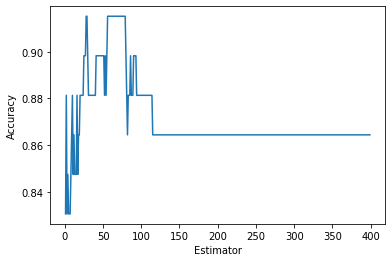

In [209]:
estimator = np.arange(1,400)
plt.plot(estimator, scores)
plt.xlabel('Estimator')
plt.ylabel('Accuracy')

### Based on the above graph, we can see that the maximum accuracy is when the no of learners equals 60. So we train the model with no of estimators equal to 60.

In [210]:
model=RandomForestClassifier(n_jobs=2,n_estimators=60,criterion="entropy",random_state=9999)
model.fit(X_train,y_train)
y_pred_rf=model.predict(X_test)
rf_score=metrics.accuracy_score(y_test, y_pred_rf)
print(rf_score)

0.9152542372881356
